In [1]:
# Importing Liberaries:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Loading Dataset
df= pd.read_csv('heart_attack_risk_analysis.csv')

# 1- Data Assessing:

In [3]:
#Loading a sample of the 1st 15 coulmns:
df.head().iloc[:,:15]

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,1,7.807690,Unhealthy,0,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,0,17.297628,Average,1,0
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,1,8.695288,Average,1,1
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,1,10.161587,Healthy,0,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,1,16.436787,Healthy,1,0


In [4]:
#Loading a sample of the last 15 coulmns:
df.head().iloc[:,15:]

,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,2,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,8,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,3,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,7,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,1,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

In [6]:
# General Charcteristics:
print('General Charcteristics of the dataset:\n')

# Shape:
print(f'  - The dataset has a shape of : {df.shape[0]} Rows and {df.shape[1]} Columns\n')

# Null Values:
nulls= df.isna().sum().sum()
if nulls == 0:
    print('  - No NULL values in this dataset\n')
else:
    print(f'  - This dataset contains {nulls} Null Values\n')

# Duplicates:
duplicates = df.duplicated().sum()
if duplicates == 0:
    print('  - No Duplicates in this dataset\n')
else:
    print(f'  - {duplicates} Rows are Duplicated\n')

General Charcteristics of the dataset:

  - The dataset has a shape of : 7010 Rows and 26 Columns

  - No NULL values in this dataset

  - No Duplicates in this dataset



In [7]:
# Number of unique values:
print(f'The number of unique value in each column:\n{df.nunique()}')

The number of unique value in each column:
Patient ID                         7010
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3590
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            7010
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            7010
Income                             6921
BMI                                7010
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                            

In [8]:
# Overview:
print('Dataset Overview:\n- Total number of patients: {} Patient.'\
      .format(df['Patient ID'].count()))

print('\n- Ages are between {} & {} years.'\
      .format(df['Age'].min(),df['Age'].max()))

print('\n- Patients are classified into {}s & {}s.'\
      .format(df['Sex'].unique()[0],df['Sex'].unique()[1]))

print('\n- Cholesterol Levels are between {} mg/dL and {} mg/dL.'\
      .format(df['Cholesterol'].min(),df['Cholesterol'].max()))

print('\n- Heart Rates are between {} beats/min and {} beats/min.'\
      .format(df['Heart Rate'].min(),df['Heart Rate'].max()))

print('\n- Non-Diabetic patients are classified as {} & Daiabetic patients as {}.'\
      .format(df['Diabetes'].unique()[0],df['Diabetes'].unique()[1]))

print('\n- Patients with No Family Related Hearts Problems are classified as {} & those With Family Related Heart Problems as {}.'\
      .format(df['Family History'].unique()[1],df['Family History'].unique()[0]))

print('\n- Non-Smokers are classified as {} & Smokers as {}.'\
      .format(df['Smoking'].unique()[1],df['Smoking'].unique()[0]))

print('\n- Not-Obese Patients are classified as {} & Obese Patients as {}.'\
      .format(df['Obesity'].unique()[1],df['Obesity'].unique()[0]))

print('\n- Patients\' Alcohol consumption is classified into {} as YES & {} as NO.'\
      .format(df['Alcohol Consumption'].unique()[0],df['Alcohol Consumption'].unique()[1]))

print('\n- Patients\' Exercise Hours are between {} hrs/week & {} hrs/week.'\
      .format(df['Exercise Hours Per Week'].round(4).min(),df['Exercise Hours Per Week'].round(4).max()))

print('\n- Patients\' Diets are clasified as {}, {}, & {}.'\
      .format(df['Diet'].unique()[0],df['Diet'].unique()[1],df['Diet'].unique()[2]))

print('\n- Patients\' Previous Heart Problems are classified into {} as YES & {} as NO.'\
      .format(df['Previous Heart Problems'].unique()[1],df['Previous Heart Problems'].unique()[0]))

print('\n- Patients\' Medication Use is classified into {} as YES & {} as NO.'\
      .format(df['Medication Use'].unique()[0],df['Medication Use'].unique()[1]))

print('\n- Patients\' Stress levels are between {} "The Lowest" & {} "The Highest".'\
      .format(df['Stress Level'].min(),df['Stress Level'].max()))

print('\n- Patients\' Sedentary Hours Per Day are between {} hrs/day & {} hrs/day.'\
      .format(df['Sedentary Hours Per Day'].round(4).min(),df['Sedentary Hours Per Day'].round(4).max()))

print('\n- Patients\' Incomes are between {} & {}.'\
      .format(df['Income'].min(),df['Income'].max()))

print('\n- Patients\' Body Mass Indecies (BMI) are between {} & {}.'\
      .format(df['BMI'].round(4).min(),df['BMI'].round(4).max()))

print('\n- Patients\' Triglycerides are between {} mg/dL & {} mg/dL.'\
      .format(df['Triglycerides'].min(),df['Triglycerides'].max()))

print('\n- Patients\' Physical Activity Days Per Week are between {} days/week & {} days/week.'\
      .format(df['Physical Activity Days Per Week'].min(),df['Physical Activity Days Per Week'].max()))

print('\n- Patients\' Sleep Hours Per Day are between {} hrs/day & {} hrs/day.'\
      .format(df['Sleep Hours Per Day'].min(),df['Sleep Hours Per Day'].max()))

print('\n- Patients are from {} different Countries in {} different Continents.'\
      .format(df['Country'].nunique(),df['Continent'].nunique()))

print('\n- Each patient\'s location is determined whether he is in the {} or the {}.'\
      .format(df['Hemisphere'].unique()[0],df['Hemisphere'].unique()[1]))

print('\n- Heart Attack Risk for each patient is classified either by {} for YES or {} for NO.'\
      .format(df['Heart Attack Risk'].unique()[0], df['Heart Attack Risk'].unique()[1]))

Dataset Overview:
- Total number of patients: 7010 Patient.

- Ages are between 18 & 90 years.

- Patients are classified into Males & Females.

- Cholesterol Levels are between 120 mg/dL and 400 mg/dL.

- Heart Rates are between 40 beats/min and 110 beats/min.

- Non-Diabetic patients are classified as 0 & Daiabetic patients as 1.

- Patients with No Family Related Hearts Problems are classified as 0 & those With Family Related Heart Problems as 1.

- Non-Smokers are classified as 0 & Smokers as 1.

- Not-Obese Patients are classified as 0 & Obese Patients as 1.

- Patients' Alcohol consumption is classified into 1 as YES & 0 as NO.

- Patients' Exercise Hours are between 0.0024 hrs/week & 19.9987 hrs/week.

- Patients' Diets are clasified as Unhealthy, Average, & Healthy.

- Patients' Previous Heart Problems are classified into 1 as YES & 0 as NO.

- Patients' Medication Use is classified into 1 as YES & 0 as NO.

- Patients' Stress levels are between 1 "The Lowest" & 10 "The Highest

In [9]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.00000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,53.510414,259.880742,75.105991,0.652782,0.491869,0.896291,0.499857,0.595863,9.979109,0.498146,0.500143,5.451783,5.994007,158245.34893,28.878692,416.782026,3.491583,7.024822,0.357204
std,21.290957,80.709248,20.507160,0.476120,0.499970,0.304904,0.500036,0.490759,5.769721,0.500032,0.500036,2.857989,3.472022,80585.31666,6.322401,224.195136,2.281077,1.990908,0.479210
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.00000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.046024,0.000000,0.000000,3.000000,2.971831,88368.00000,23.422280,221.000000,2.000000,5.000000,0.000000
50%,53.000000,259.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,9.982968,0.000000,1.000000,5.000000,5.936919,157378.50000,28.737627,416.000000,3.000000,7.000000,0.000000
75%,72.000000,329.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.029659,1.000000,1.000000,8.000000,9.017592,227218.50000,34.321158,613.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.00000,39.993581,800.000000,7.000000,10.000000,1.000000


In [10]:
df_stats= df.describe()\
.loc[:,['Age', 'Cholesterol','Heart Rate','Exercise Hours Per Week','Stress Level','Sedentary Hours Per Day','Income','BMI','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day']]\
.round(4)
df_stats

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
count,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000
mean,53.5104,259.8807,75.1060,9.9791,5.4518,5.9940,158245.3489,28.8787,416.7820,3.4916,7.0248
std,21.2910,80.7092,20.5072,5.7697,2.8580,3.4720,80585.3167,6.3224,224.1951,2.2811,1.9909
min,18.0000,120.0000,40.0000,0.0024,1.0000,0.0013,20062.0000,18.0023,30.0000,0.0000,4.0000
25%,35.0000,192.0000,57.0000,5.0460,3.0000,2.9718,88368.0000,23.4223,221.0000,2.0000,5.0000
50%,53.0000,259.0000,75.0000,9.9830,5.0000,5.9369,157378.5000,28.7376,416.0000,3.0000,7.0000
75%,72.0000,329.0000,93.0000,15.0297,8.0000,9.0176,227218.5000,34.3212,613.0000,5.0000,9.0000
max,90.0000,400.0000,110.0000,19.9987,10.0000,11.9993,299954.0000,39.9936,800.0000,7.0000,10.0000


''

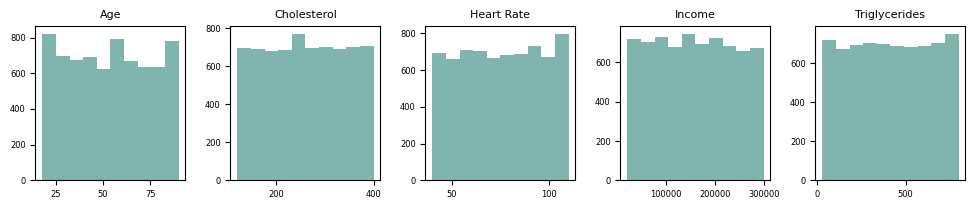

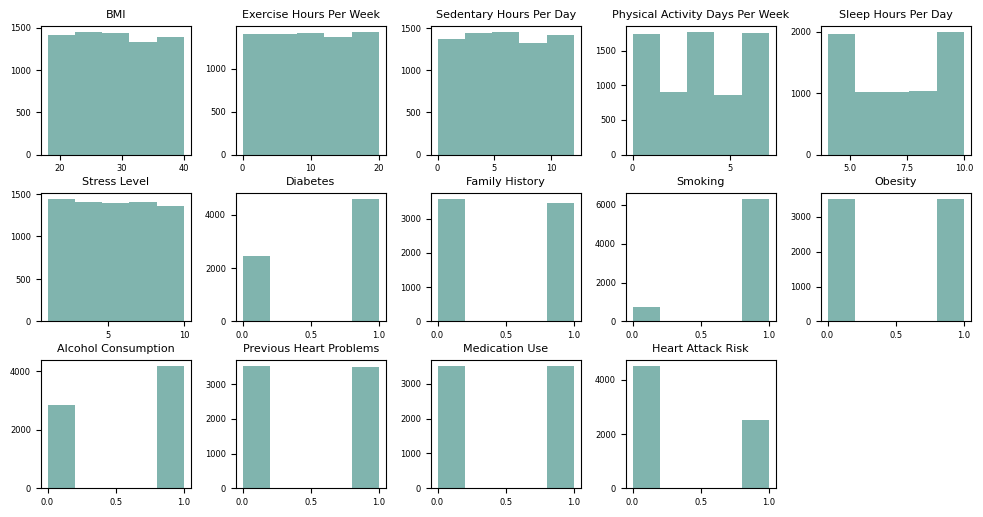

In [11]:
hist1 =df.iloc[:,[1,3,5,17,19]]
hist2 =df.iloc[:,[18,11,16,20,21,15,6,7,8,9,10,13,14,25]]
fig1=hist1.hist(grid=False, figsize=(12,2),xlabelsize=6,ylabelsize=6,bins=10,layout=(1,5),color ='#80B4ae')
[x.title.set_size(8) for x in fig1.ravel()];
fig2=hist2.hist(grid=False, figsize=(12,6),xlabelsize=6,ylabelsize=6,bins=5,layout=(3,5),color='#80B4ae')
[x.title.set_size(8) for x in fig2.ravel()]
;

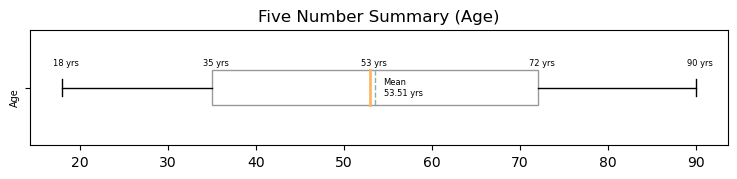

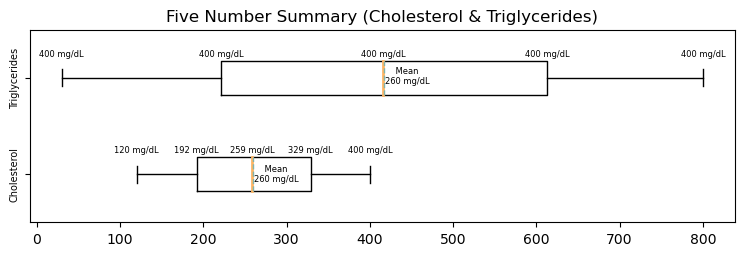

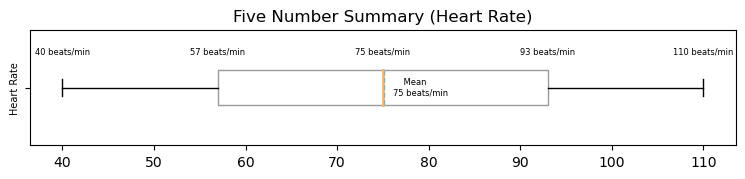

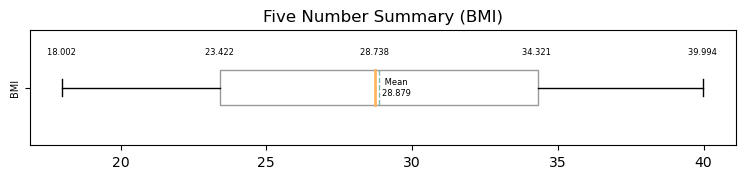

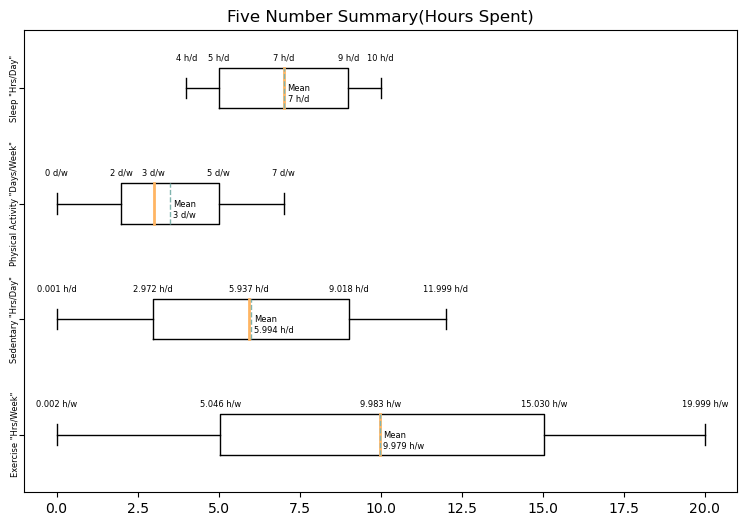

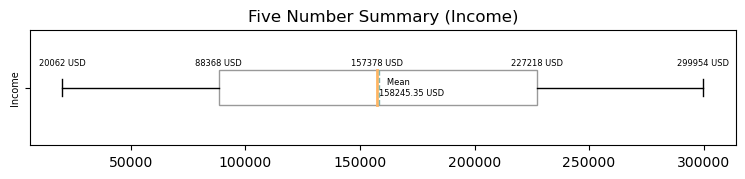

In [12]:
#Distributions (Five Number Summary):

#1- Five Number Summary (Age)
plt.subplots(figsize = (9,1.5))

sns.boxplot(x=df.Age,showmeans=True,meanline=True,showcaps = True, color="white", width=.3,boxprops={"linewidth": 1},
            medianprops={ "color" : "#ffb563","linewidth": 2},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#80B4ae","linewidth": 1 },autorange=True)

for i, v in enumerate(df_stats.iloc[[3,4,5,6,7],0]):
  plt.text(v-1,-.25,f'{v:.0f} yrs', ha='left', va='top',fontsize=6)
for k, l in enumerate(df_stats.iloc[[1],0]):
  plt.text(l+1,0,f'Mean\n{l:.2f} yrs', ha='left', va='center',fontsize=6)

plt.ylabel('Age',fontsize=7,rotation=90, ha='right', va='center')
plt.xlabel(None)
plt.title('Five Number Summary (Age)')
plt.show();


#2- Five Number Summary (Cholesterol & Triglycerides)
plt.subplots(figsize = (9.1,2.5))

plt.boxplot(df.iloc[:,[3,19]],showmeans=True,meanline=True,showcaps = True, widths=.35, 
            medianprops={ "color" : "#ffb563","linewidth": 2},boxprops={"linewidth": 1},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#80B4ae","linewidth": 1 },vert=False)

for i, v in enumerate(df_stats.iloc[[3,4,5,6,7],1]):
  plt.text(v,1.2,f'{v:.0f} mg/dL', ha='center', va='bottom',fontsize=6)
for k, l in enumerate(df_stats.iloc[[1],1]):
  plt.text(l+1,1,f'    Mean\n{l:.0f} mg/dL', ha='left', va='center',fontsize=6)
for x,y in enumerate(df_stats.iloc[[3,4,5,6,7],8]):
  plt.text(y,2.3,f'{v:.0f} mg/dL', ha='center', va='top',fontsize=6)
for o,q in enumerate(df_stats.iloc[[1],8]):
  plt.text(q+1,2.02,f'    Mean\n{l:.0f} mg/dL', ha='left', va='center',fontsize=6)
#plt.ylabel(['Cholesterol','Triglycerides'])
plt.yticks([1,2],['Cholesterol','Triglycerides'],fontsize=7,rotation=90, ha='right', va='center')
plt.xlabel(None)
plt.title('Five Number Summary (Cholesterol & Triglycerides)')
plt.show();


#3- Five Number Summary (Heart Rate)
plt.subplots(figsize = (9.1,1.5))

sns.boxplot(x=df['Heart Rate'],showmeans=True,meanline=True,showcaps = True, color="white", width=.3,
            medianprops={ "color" : "#ffb563","linewidth": 2},boxprops={"linewidth": 1},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#80B4ae","linewidth": 1 })

for i, v in enumerate(df_stats.iloc[[3,4,5,6,7],2]):
  plt.text(v,-.35,f'{v:.0f} beats/min', ha='center', va='top',fontsize=6)
for k, l in enumerate(df_stats.iloc[[1],2]):
  plt.text(l+1,0,f'    Mean\n{l:.0f} beats/min', ha='left', va='center',fontsize=6)

plt.ylabel('Heart Rate',fontsize=7,rotation=90, ha='center', va='center')
plt.xlabel(None)
plt.title('Five Number Summary (Heart Rate)')
plt.show();


#4- Five Number Summary (BMI)
plt.subplots(figsize = (9.1,1.5))

sns.boxplot(x=df['BMI'],showmeans=True,meanline=True,showcaps = True, color="white", width=.3,
            medianprops={ "color" : "#ffb563","linewidth": 2},boxprops={"linewidth": 1},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#80B4ae","linewidth": 1 })

for i, v in enumerate(df_stats.iloc[[3,4,5,6,7],7]):
  plt.text(v,-.35,f'{v:.3f} ', ha='center', va='top',fontsize=6)
for k, l in enumerate(df_stats.iloc[[1],7]):
  plt.text(l+.1,0,f' Mean\n{l:.3f} ', ha='left', va='center',fontsize=6)

plt.ylabel('BMI',fontsize=7,rotation=90, ha='center', va='center')
plt.xlabel(None)
plt.title('Five Number Summary (BMI)')
plt.show();

#5- Five Number Summary (Hours Spent)
plt.subplots(figsize = (9.2,6))

plt.boxplot(df.iloc[:,[11,16,20,21]],showmeans=True,meanline=True,showcaps = True, widths=.35, 
            medianprops={ "color" : "#ffb563","linewidth": 2},boxprops={"linewidth": 1},
            whiskerprops={"color": "black", "linewidth": 1},capprops={"color": "black", "linewidth": 1},
            meanprops = {"color": "#80B4ae","linewidth": 1 },vert=False)

for i, v in enumerate(df_stats.iloc[[3,4,5,6,7],3]):
  plt.text(v,1.3,f'{v:.3f} h/w', ha='center', va='top',fontsize=6)
for k, l in enumerate(df_stats.iloc[[1],3]):
  plt.text(l+.1,.95,f'Mean\n{l:.3f} h/w', ha='left', va='center',fontsize=6)
for x, y in enumerate(df_stats.iloc[[3,4,5,6,7],5]):
  plt.text(y,2.3,f'{y:.3f} h/d', ha='center', va='top',fontsize=6)
for q, z in enumerate(df_stats.iloc[[1],5]):
  plt.text(z+.1,1.95,f'Mean\n{z:.3f} h/d', ha='left', va='center',fontsize=6)
for a, b in enumerate(df_stats.iloc[[3,4,5,6,7],9]):
  plt.text(b,3.3,f'{b:.0f} d/w', ha='center', va='top',fontsize=6)
for c, d in enumerate(df_stats.iloc[[1],9]):
  plt.text(d+.1,2.95,f'Mean\n{d:.0f} d/w', ha='left', va='center',fontsize=6)
for e, f in enumerate(df_stats.iloc[[3,4,5,6,7],10]):
  plt.text(f,4.3,f'{f:.0f} h/d', ha='center', va='top',fontsize=6)
for h, j in enumerate(df_stats.iloc[[1],10]):
  plt.text(j+.1,3.95,f'Mean\n{j:.0f} h/d', ha='left', va='center',fontsize=6)

plt.yticks([1,2,3,4],['Exercise "Hrs/Week"','Sedentary "Hrs/Day"','Physical Activity "Days/Week"','Sleep "Hrs/Day"'],
           fontsize=6,rotation=90, ha='center', va='center')
plt.xlabel(None)
plt.title('Five Number Summary(Hours Spent)')
plt.show();

#5- Five Number Summary (Income)
plt.subplots(figsize = (9.1,1.5))

sns.boxplot(x=df.Income,showmeans=True,meanline=True,showcaps = True, color="white", width=.3,boxprops={"linewidth": 1},
            medianprops={ "color" : "#ffb563","linewidth": 2},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#80B4ae","linewidth": 1 },autorange=True)

for i, v in enumerate(df_stats.iloc[[3,4,5,6,7],6]):
  plt.text(v,-.25,f'{v:.0f} USD', ha='center', va='top',fontsize=6)
for k, l in enumerate(df_stats.iloc[[1],6]):
  plt.text(l,0,f'   Mean\n{l:.2f} USD', ha='left', va='center',fontsize=6)

plt.ylabel('Income',fontsize=7,rotation=90, ha='center', va='center')
plt.xlabel(None)
plt.title('Five Number Summary (Income)')
plt.show();

# 2. Data Cleaning
- **Renaming Columns**
- **Categorization**

## Ranaming Columns
To facilitate easier analysis, the column labels will be modified by:
1. Converting uppercase letters to lowercase
2. Replacing spaces with underscores
3. Using abbreviations where appropriate<br>

***As follows***
- Patient ID ***to*** p_id
- Age ***to*** age
- Sex ***to*** gender
- Cholesterol ***to*** chol
- Blood Pressure ***to*** bp
- Heart Rate ***to*** h_rate
- Diabetes ***to*** dm
- Family History ***to*** fam_history
- Smoking ***to*** smoking
- Obesity ***to*** obesity
- Alcohol Consumption ***to*** alcohol_cons 
- Exercise Hours Per Week ***to*** ex_hrs_wk 
- Diet ***to*** diet
- Previous Heart Problems ***to*** pre_h_problems
- Medication Use ***to*** med_use
- Stress Level ***to*** stress_level
- Sedentary Hours Per Day ***to*** sed_hrs
- Income ***to*** inc
- BMI ***to*** bmi
- Triglycerides ***to*** tg
- Physical Activity Days Per Week ***to*** pa_d_wk
- Sleep Hours Per Day ***to*** slp_hrs_d 
- Country ***to*** country
- Continent ***to*** continent
- Hemisphere ***to*** hemi
- Heart Attack Risk ***to*** h_a_risk

In [13]:
# Renaming all columns:
df=df.rename(columns={'Patient ID' : 'p_id','Age' : 'age','Sex' : 'gender','Cholesterol' : 'chol','Blood Pressure' : 'bp',
                      'Heart Rate' : 'h_rate','Diabetes' : 'dm','Family History' : 'fam_history','Smoking' : 'smoking',
                      'Obesity' : 'obesity','Alcohol Consumption' : 'alcohol_cons','Exercise Hours Per Week' : 'ex_hrs_wk',
                      'Diet' : 'diet','Previous Heart Problems' : 'pre_h_problems','Medication Use' : 'med_use',
                      'Stress Level' :'stress_level','Sedentary Hours Per Day' : 'sed_hrs','Income' : 'income','BMI' : 'bmi',
                      'Triglycerides' : 'tg','Physical Activity Days Per Week' : 'pa_d_wk','Sleep Hours Per Day' : 'slp_hrs_d',
                      'Country' : 'country','Continent' : 'continent','Hemisphere' : 'hemi','Heart Attack Risk' : 'h_a_risk'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   p_id            7010 non-null   object 
 1   age             7010 non-null   int64  
 2   gender          7010 non-null   object 
 3   chol            7010 non-null   int64  
 4   bp              7010 non-null   object 
 5   h_rate          7010 non-null   int64  
 6   dm              7010 non-null   int64  
 7   fam_history     7010 non-null   int64  
 8   smoking         7010 non-null   int64  
 9   obesity         7010 non-null   int64  
 10  alcohol_cons    7010 non-null   int64  
 11  ex_hrs_wk       7010 non-null   float64
 12  diet            7010 non-null   object 
 13  pre_h_problems  7010 non-null   int64  
 14  med_use         7010 non-null   int64  
 15  stress_level    7010 non-null   int64  
 16  sed_hrs         7010 non-null   float64
 17  income          7010 non-null   i

### Cetegorization
***1. age_stages:***
   - **young_adult:** Ages between 18 & 35
   - **mid_age_adult:** Ages more than 35 & equal 53
   - **late_adulthood:** Ages more than 53 & equal 72
   - **elderly:** Ages more than 72

***2. chol_ind:***
- **healthy:** Cholesterol Levels are less than 200 mg/dL.
- **at_risk:** Cholesterol Levels are between 200 mg/dL and 239 mg/dL.
- **dangerous:** Cholesterol Levels are more than 239 mg/dL.

***3. bp_ind:***
- **normal:** systolic <120 & < diastolic 80
- **elevated:** systolic 120 to 129 & < diastolic 80
- **htn_1:** systolic 130 to 139 &/or diastolic 80-89
- **htn_2:** systolic 140 to <180 &/or diastolic >90 - <120
- **htn_crisis:** systolic 180 & higher &/or diastolic 120 & higher
   
***4. h_rate_ind:***
  - **low**
  - **normal**
  - **high**<br>
>***Note:*** <br>
>_Heart Rate Indicator is calculated according to the following formula:_ <br>
> _a) 220 - your age = maximum._ <br>
> _b) Maximum x 0.6 = low end of target range._ <br>
> _c) Maximum x 0.8 = high end of target range._ <br>

***5. ex_activity:***
- **low:** Exercise Hours are less than or equal 5 hrs/week.
- **moderate:** Exercise Hours more than 5 hrs/week to 10 hrs/week.
- **high:** Exercise Hours more than 10 hrs/week to 15 hrs/week.
- **very_high:** Exercise Hours are more than 15 hrs/week.

***6. sed_level:***
- **low_risk:** Sitting for less than 4 hours per day.
- **medium_risk:** Sitting for 4–8 hours per day.
- **high_risk:** Sitting for more than 8–11 hours per day.
- **very_high_risk:** Sitting for more than 11 hours per day.

***7. income_level:***
- **low:** income that is less than 88000 USD
- **moderate:** income from 88000 USD to less than 157000 USD.
- **high:** income from 157000 USD to less than 227000 USD.
- **very_high:** income tht is more than 227000 USD.

***8. bmi_ind:***
- **underweight:** under 18.5 mg/dL
- **healthy:** between 18.5 mg/dL and 24.9 mg/dL
- **overweight:** between 25mg/dL and 29.9 mg/dL
- **obesity:** between 30 mg/dL and 39.9 mg/dL
- **severe_obesity:** 40 mg/dL & over

***9. tg_indicator:***
- **normal:** _Ages between 10 & 19_ below 90 mg/dL.
- **normal:** _Adults_ below 150 mg/dL.
- **mild:** 150-199 mg/dL.
- **moderate:** 200-499 mg/dL.
- **severe:** Greater than 500 mg/dL.

***10. pa_level:*** 
- **inactive:** less than 2 days/week _(High Risk)_
- **low_active:** from 2 to 3 days/week _(Needs Improvement)_
- **moderately_active:** from 4 to 5 days/week _(Meets Recommendations)_
- **highly_active:** more than 5 days/week _(Excellent)_

***11. slp_hrs_ind*** 
- ***very_poor:*** less than 5 hours/day _(Severly Short sleep)_
- ***needs_improvemrnt:*** from 5 to less than 7 hours/day _(Short Sleep)_
- ***healthy:*** from 7 to 9 hours/day _(Optimal Sleep)_
- ***monitor_issues:*** more than 9 hours/day _(Long Sleep)_

In [14]:
# 1- Adding age_stage coulmn
df['age_stage']=['young_adult' if 18<=x<=35 
                else 'Mid_age_adult' if 35<x<=53
                else 'late_adulthood' if 53<x<=72
                else 'elderly' for x in df.age]
df.insert(2,'age_stage',df.pop('age_stage'))

In [15]:
# 2- Adding chol_indicator coulmn
df['chol_ind']=['healthy' if x<200 
                else 'at_risk' if 200<=x<=239
                else 'dangerous' for x in df.chol]
df.insert(5,'chol_ind',df.pop('chol_ind'))

In [16]:
# 3- Adding bp_indicator coulmn 
df['bp_ind']=['normal' if int(x.split('/')[0])<120 and int(x.split('/')[1])<80
             else 'elevated' if 120<=int(x.split('/')[0])<=129 and int(x.split('/')[1])<80
             else 'htn_1' if 129<int(x.split('/')[0])<=139 or 80<= int(x.split('/')[1])<90
             else 'htn_2'if 140<= int(x.split('/')[0])<=180 or 90<=int(x.split('/')[1])<120 
             else 'htn_crisis' for x in df.bp]
df.insert(7,'bp_ind',df.pop('bp_ind'))

In [17]:
# 4- Adding h_rate_ind coulmn
df['h_rate_ind']=np.where((220-df['age'])*.6> df['h_rate'],'low','normal')
df['h_rate_ind']=np.where((220-df['age'])*.8< df['h_rate'],'high',df['h_rate_ind'])
df.insert(9,'h_rate_ind',df.pop('h_rate_ind'))

In [18]:
# 5- Adding ex_activity coulmn
df['ex_activity']=['low' if x<=5 
                else 'moderate' if 5<x<=10
                else 'high' if 10<x<=15
                else 'very_high' for x in df['ex_hrs_wk']]
df.insert(16,'ex_activity',df.pop('ex_activity'))

In [19]:
# 6- Adding sed_level coulmn
df['sed_level']=['low_risk' if x<4 
                else 'medium_risk' if 4<=x<=8
                else 'high_risk' if 8<x<=11
                else 'very_high_risk' for x in df['sed_hrs']]
df.insert(22,'sed_level',df.pop('sed_level'))

In [20]:
# 7- Adding income_level coulmn
df['income_level']=['low' if x<88000 
                else 'moderate' if 88000<=x<157000
                else 'high' if 157000<=x<227000
                else 'very_high' for x in df['income']]
df.insert(24,'income_level',df.pop('income_level'))

In [21]:
# 8- Adding bmi_ind coulmn 
df['bmi_ind']=['underweight' if x<18.5
             else 'healthy' if 18.5<=x<25
             else 'overweight' if 25<=x<30
             else 'obesity'if 30<=x<40 
             else 'severe_obesity' for x in df.bmi]
df.insert(26,'bmi_ind',df.pop('bmi_ind'))

In [22]:
# 9- Adding tg_ind coulmn
df['tg_ind']=np.where((df.age<20) & (df.tg<90),'normal','severe')
df['tg_ind']=np.where((df.age>=20) & (df.tg<150),'normal',df['tg_ind'])
df['tg_ind']=np.where((150<=df.tg) & (df.tg<200),'mild',df['tg_ind'])
df['tg_ind']=np.where((200<df.tg) & (df.tg<500),'moderate',df['tg_ind'])
df.insert(28,'tg_ind',df.pop('tg_ind'))

In [23]:
# 10- Adding pa_level coulmn
df['pa_level']=['inactive' if x<2 
                else 'low_active' if 2<=x<4
                else 'moderately_active' if 4<=x<6
                else 'highly_active' for x in df['pa_d_wk']]
df.insert(30,'pa_level',df.pop('pa_level'))

In [24]:
# 11- Adding slp_hrs_ind column 
df['slp_hrs_ind']=['very_poor' if x<5
                  else 'needs_improvement' if 5<=x<7
                  else 'healthy' if 7<=x<=9
                  else 'monitor_issues' for x in df['slp_hrs_d']]
df.insert(32,'slp_hrs_ind',df.pop('slp_hrs_ind'))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   p_id            7010 non-null   object 
 1   age             7010 non-null   int64  
 2   age_stage       7010 non-null   object 
 3   gender          7010 non-null   object 
 4   chol            7010 non-null   int64  
 5   chol_ind        7010 non-null   object 
 6   bp              7010 non-null   object 
 7   bp_ind          7010 non-null   object 
 8   h_rate          7010 non-null   int64  
 9   h_rate_ind      7010 non-null   object 
 10  dm              7010 non-null   int64  
 11  fam_history     7010 non-null   int64  
 12  smoking         7010 non-null   int64  
 13  obesity         7010 non-null   int64  
 14  alcohol_cons    7010 non-null   int64  
 15  ex_hrs_wk       7010 non-null   float64
 16  ex_activity     7010 non-null   object 
 17  diet            7010 non-null   o

# 3. Data Exploring

In [26]:
# gender 
gender_ratio= df.groupby('gender').p_id.nunique().reset_index().rename(columns={'index':'gender','p_id':'p_num'})
gender_ratio['p_pct']=gender_ratio['p_num']/gender_ratio['p_num'].sum()
gender_ratio.style.hide().format({'p_pct':'{:,.2%}'})


gender,p_num,p_pct
Female,2119,30.23%
Male,4891,69.77%


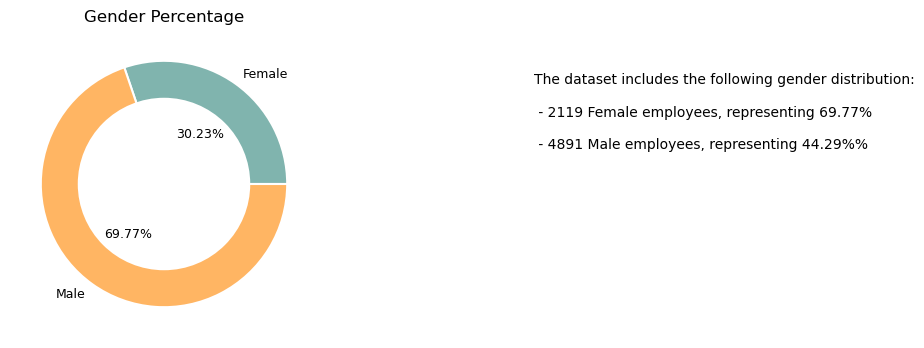

In [27]:
g_class = gender_ratio.gender.to_list()
text = ''' 
The dataset includes the following gender distribution:\n
 - 2119 Female employees, representing 69.77%\n
 - 4891 Male employees, representing 44.29%%\n
 '''

plt.subplots(figsize = (4,4))
plt.pie(gender_ratio['p_num'], labels=g_class,radius=1, colors= ['#80B4ae','#ffb563'], 
        autopct='%1.2f%%',labeldistance=1.1,pctdistance=.5,textprops={'fontsize': 9}, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Gender Percentage')
plt.text(3,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [42]:
dm_ratio = df.groupby('dm').p_id.nunique().reset_index().rename(columns={'p_id':'p_count'})
dm_ratio['dm']=np.where(dm_ratio['dm']==0,'No','Yes')
dm_ratio['pct']= dm_ratio['p_count']/dm_ratio['p_count'].sum()
dm_ratio.style.hide().format({'pct':'{:,.2%}'})

dm,p_count,pct
No,2434,34.72%
Yes,4576,65.28%


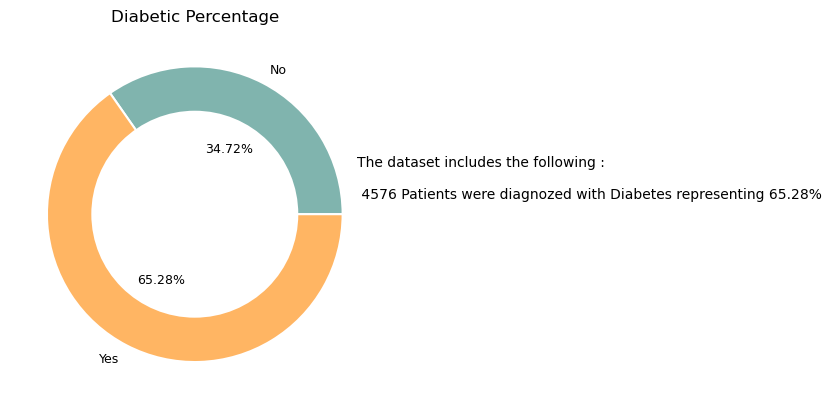

In [62]:
labels_dm = dm_ratio['dm'].to_list()
text = ''' 
The dataset includes the following :\n
 4576 Patients were diagnozed with Diabetes representing 65.28%
 '''
#plt.subplot(figsize=(4,4))
plt.pie(dm_ratio['p_count'],radius=1,labels= labels_dm, 
        colors= ['#80B4ae','#ffb563'],autopct='%1.2f%%',
        labeldistance=1.1,pctdistance=.5,textprops={'fontsize': 9}, 
        wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
cc = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(cc)
plt.title('Diabetic Percentage')
plt.text(1.1,0,text);

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   p_id            7010 non-null   object 
 1   age             7010 non-null   int64  
 2   age_stage       7010 non-null   object 
 3   gender          7010 non-null   object 
 4   chol            7010 non-null   int64  
 5   chol_ind        7010 non-null   object 
 6   bp              7010 non-null   object 
 7   bp_ind          7010 non-null   object 
 8   h_rate          7010 non-null   int64  
 9   h_rate_ind      7010 non-null   object 
 10  dm              7010 non-null   int64  
 11  fam_history     7010 non-null   int64  
 12  smoking         7010 non-null   int64  
 13  obesity         7010 non-null   int64  
 14  alcohol_cons    7010 non-null   int64  
 15  ex_hrs_wk       7010 non-null   float64
 16  ex_activity     7010 non-null   object 
 17  diet            7010 non-null   o

In [41]:
family_history = df.groupby('fam_history').p_id.nunique().reset_index().rename(columns={'p_id':'p_count'})
family_history['fam_history']=np.where(family_history['fam_history']==0,'No','Yes')
family_history['pct']=family_history['p_count']/family_history['p_count'].sum()
family_history.style.hide().format({'pct':'{:,.2%}'})

fam_history,p_count,pct
No,3562,50.81%
Yes,3448,49.19%


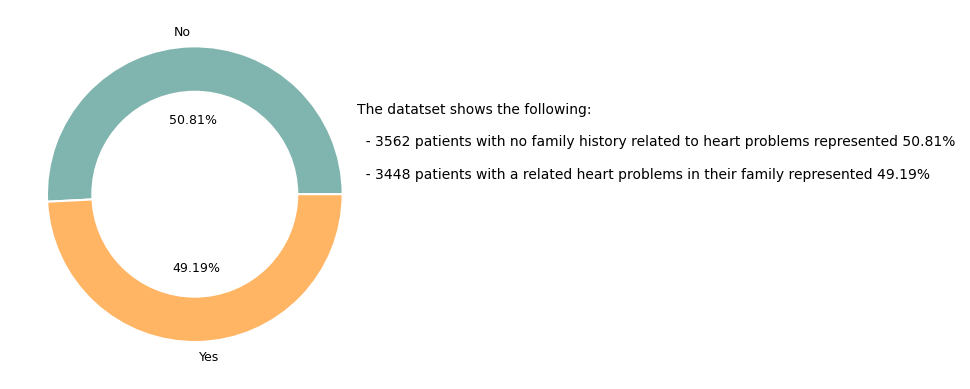

In [61]:
labels = family_history['fam_history'].to_list()
text = '''
The datatset shows the following:
\n  - 3562 patients with no family history related to heart problems represented 50.81% 
\n  - 3448 patients with a related heart problems in their family represented 49.19%
'''
plt.pie(family_history.p_count, labels = labels, autopct='%1.2f%%',colors=['#80B4ae','#ffb563'],radius=1,
       labeldistance=1.1,wedgeprops={'linewidth':1.5,'edgecolor':'white'},
       pctdistance=.5,textprops={'fontsize': 9})
cc=plt.Circle((0,0),.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(cc)
plt.text(1.1,0,text);